<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220920_MNIST_%EC%8B%A4%EC%8A%B501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Library Import**

In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

### **2. 데이터 확인 및 전처리**

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __try01 baseline 모델에서 Hyper Parameter 수정__

수정 Hyper Parameter

> optimizer, ephochs 수, batch_size, 검증데이터 설정 여부 등

In [ ]:
import keras                                               # histroy 함수를 위해 import

#### optimizer = adam / epoch = 20 / 검증데이터 추가(0.2)

:baseline 모델에 비해 큰 성능차이를 보이지 않으며 오히려 더 많은 epoch을 돌린 기본 모델보다 loss율이 크다. 

In [ ]:
model_1_1 = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_1_1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.9206 - val_loss: 0.1354 - val_accuracy: 0.9613
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 0.1035 - val_accuracy: 0.9699
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.1039 - val_accuracy: 0.9688
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.1000 - val_accuracy: 0.9719
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.1047 - val_accuracy: 0.9725
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0373 - accuracy: 0.9872 - val_loss: 0.1092 - val_accuracy: 0.9701
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0991 - val_accuracy:

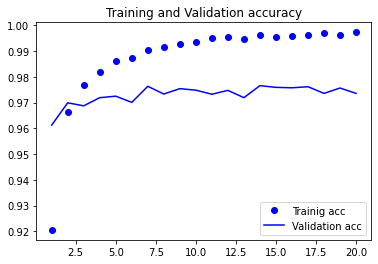

In [ ]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_1_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1318 - accuracy: 0.9755


[0.1317669004201889, 0.9754999876022339]

#### optimizer = adam / epoch = 20 / 검증데이터 추가(0.2) / batch_size=64

loss는 감소했지만 accuracy도 근소하게 감소함

In [ ]:
model_1_2 = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_1_2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3114 - accuracy: 0.9105 - val_loss: 0.1613 - val_accuracy: 0.9535
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1246 - accuracy: 0.9629 - val_loss: 0.1228 - val_accuracy: 0.9632
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0833 - accuracy: 0.9748 - val_loss: 0.0985 - val_accuracy: 0.9712
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0636 - accuracy: 0.9812 - val_loss: 0.0894 - val_accuracy: 0.9735
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0918 - val_accuracy: 0.9732
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0846 - val_accuracy: 0.9762
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0900 - val_accuracy: 0.9751
Epoch 

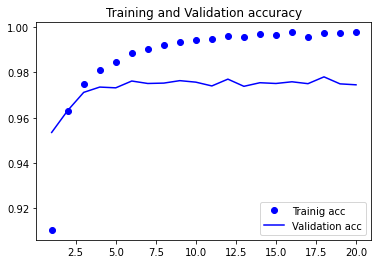

In [ ]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_1_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9751


[0.12822434306144714, 0.9750999808311462]

### __try02 baseline 모델에서 은닉층 추가__

수정 Hyper Parameter

> 노드 수, layer 수, optimizer, ephochs 수, batch_size, 검증데이터 설정 여부 등

> layer 추가 / optimizer = SGD / loss = categorical_crossentropy function / epoch = 30 / 검증데이터 추가(0.2) / batch_size=64

In [ ]:
model_2_1 = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_2_1.compile(optimizer='SGD', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
hist_2_1 = model_2_1.fit(train_imgs, train_labels, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0713 - accuracy: 0.6623 - val_loss: 0.3503 - val_accuracy: 0.8968
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3020 - accuracy: 0.9106 - val_loss: 0.2360 - val_accuracy: 0.9312
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2130 - accuracy: 0.9377 - val_loss: 0.1801 - val_accuracy: 0.9476
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1650 - accuracy: 0.9513 - val_loss: 0.1663 - val_accuracy: 0.9518
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1354 - accuracy: 0.9606 - val_loss: 0.1428 - val_accuracy: 0.9583
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1155 - accuracy: 0.9654 - val_loss: 0.1560 - val_accuracy: 0.9523
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9706 - val_loss: 0.1265 - val_accuracy:

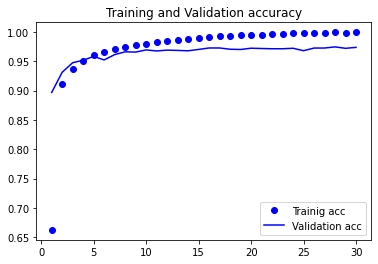

In [ ]:
acc = hist_2_1.history['accuracy']
val_acc = hist_2_1.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_2_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1151 - accuracy: 0.9744


[0.11506375670433044, 0.974399983882904]